# Framingham Heart Study - Logistic Regression Analysis

## Step 1: Importing Required Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif

    

## Step 2: Load and Preprocess Dataset

In [17]:

# Load dataset
df = pd.read_csv('/home/diti/Downloads/framingham.csv')

# Drop unnecessary columns
df.drop(['education'], axis=1, inplace=True)

# Rename column for consistency
df.rename(columns={'male': 'Sex_male'}, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Split features and target variable
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
    

## Step 3: Feature Scaling and SMOTE for Balancing Data

In [18]:

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
    

## Step 4: Train-Test Split

In [19]:
# Feature Engineering: Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)


In [20]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
    

In [21]:
# Feature Selection
selector = SelectKBest(f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/home/diti/.local/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=14. All the features will be returned.
  warnings.warn(


In [22]:
# Hyperparameter Tuning for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [23]:

# Best model
best_model = grid_search.best_estimator_

## Step 5: Train Logistic Regression Model

In [24]:

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

    

LogisticRegression()

## Step 6: Model Evaluation

In [26]:

# Predictions
#y_pred = model.predict(X_test)
y_pred = best_model.predict(X_test_selected)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
    

Accuracy: 0.6737
Precision: 0.6728
Recall: 0.6885
F1 Score: 0.6805


## Step 7: Confusion Matrix & ROC Curve

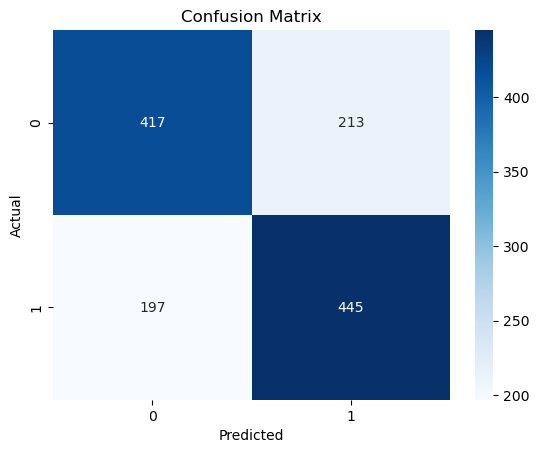

In [7]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
    

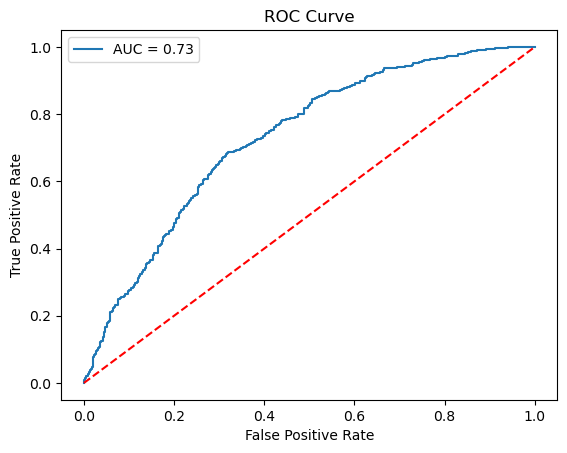

In [29]:

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
    

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')

Random Forest Accuracy: 0.8868
